In [3]:
#import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
%matplotlib inline

# 1. Students' performance
* Students can take practices and assessments through this platform. 
* I created two categories of features: total number of problems the students have taken and the improvement of students'score, i.e.g assessment score/practice score. 
* Lastly, I aggregate students' number of problems and scroe improvement by each teacher. 
* The outputs are:
 * teacher_id
 * total_practice_month_teacher: the aggregate number of practices assigned to the students by teacher id by year-month
 * score_improve: the score improvement by teacher by year-month
 * practice_first_month_teacher: the month the teacher started to assign the first practice


In [108]:

# Read the file
df1 = pd.read_csv("C:/Users/peta/Desktop/Physics/student_score.csv")

# unit to number
df1['unit_id'] = pd.to_numeric(df1['unit_id'], errors = 'coerce')

# time to datetime and month
df1['insert_dtm']= pd.to_datetime(df1['insert_dtm'])
df1['practice_month'] = df1['insert_dtm'].dt.strftime('%Y-%m')

# count the total number of practices taken
df2 = df1.groupby(['student_id', 'practice_month'])['num_problems'].sum().to_frame()
df2 = df2.rename(columns={'num_problems':'total_practice_month'})
df2.reset_index(level = 0, inplace = True)
df2.reset_index(level = 0, inplace = True)
df1 = df1.merge(df2, on = ['student_id', 'practice_month'])

# get the first problem date: practice_first
try1 = df1.groupby(['student_id'])['insert_dtm'].min().to_frame()
try1.reset_index(level = 0, inplace = True)
try1 = try1.rename(columns = {'insert_dtm': 'practice_first'})
df1 = df1. merge(try1, on = ['student_id'])
df1['practice_first_month'] = df1['practice_first'].dt.strftime('%Y-%m')
try8= df1.groupby(['teacher_id'])['insert_dtm'].min().to_frame()
try8.reset_index(level = 0, inplace = True)
try8['practice_first_month_teacher'] = try8['insert_dtm'].dt.strftime('%Y-%m')
try8 = try8.drop(['insert_dtm'], axis = 1)

# get the update total number of problems accessed
## if start after 15, weight it!
## define a function 
def weight_practices(x, y):
        '''x: datetime
           y: number'''
        x = int(x.strftime('%d'))
        #x = int(x)
        if x<=15: return y
        else: return y*2
df1['total_practice_month_udpated']    = df1['total_practice_month']   
df1.loc[df1['practice_first_month']==df1['practice_month'], ['total_practice_month_udpated']] = \
df1.apply(lambda x: weight_practices(x['practice_first'], x['total_practice_month']), axis =1)


# calculate the avg of total problems taken each student by teacher
df2 = df1[['student_id', 'teacher_id', 'practice_month', 'total_practice_month', 'total_practice_month_udpated']]
df2 = df2.drop_duplicates()

try7 = df2.groupby(['teacher_id', 'practice_month'])['total_practice_month','total_practice_month_udpated'].mean()
try7.reset_index(level = 0, inplace = True)
try7.reset_index(level = 0, inplace = True)
try7.reset_index(level = 0, inplace = True)
try7 = try7.rename(columns={'total_practice_month':'total_practice_month_teacher','total_practice_month_udpated': 'total_practice_month_udpated_teacher'})


# calculate student performance for type 1 questions
df1 = df1.drop(['insert_dtm', 'update_dtm', 'num_problems'], axis = 1)
try1 = df1.loc[df1['problem_type'] == 1]
try2 = df1.loc[df1['problem_type'] != 1]
try4 = try1.groupby(['student_id', 'unit_id', 'practice_month', 'teacher_id'])['avg_score'].mean().to_frame()
try4 = try4.rename(columns={'avg_score':'avg_score_1'})
try4.reset_index(level = 0, inplace = True)
try4.reset_index(level = 0, inplace = True)
try4.reset_index(level = 0, inplace = True)
try4.reset_index(level = 0, inplace = True)

# calculate student performance for type 2 questions
try3 = try2.groupby(['student_id', 'unit_id', 'practice_month', 'teacher_id'])['avg_score'].mean().to_frame()
try3 = try3.rename(columns={'avg_score':'avg_score_2'})
try3.reset_index(level = 0, inplace = True)
try3.reset_index(level = 0, inplace = True)
try3.reset_index(level = 0, inplace = True)
try3.reset_index(level = 0, inplace = True)

# merge them all
try5 = try3.merge(try4, on = ['teacher_id', 'practice_month', 'unit_id', 'student_id'])

try5['score_improve'] = try5['avg_score_2']/try5['avg_score_1']
try5 = try5.drop(['unit_id','student_id', 'avg_score_2', 'avg_score_1'], axis =1)

# get the mean improve score by month, by teacher
try6 = try5.groupby(['teacher_id', 'practice_month'])['score_improve'].mean().to_frame()
try6.reset_index(level = 0, inplace = True)
try6.reset_index(level = 0, inplace = True)

# merege try7 try6 to generate df1
df1 = try7.merge(try6, on = ['practice_month', 'teacher_id'])
# pivot table


# pivot table

df1=df1.pivot(index='teacher_id', columns='practice_month')[['total_practice_month_teacher', 'total_practice_month_udpated_teacher','score_improve']]
df1.reset_index(level = 0, inplace = True)
df1.columns = list(map('_'.join, df1.columns))
df1 = df1.rename(columns={'teacher_id_':'teacher_id'})
df1 = df1.merge(try8, on = ['teacher_id'])

C:\Users\peta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 461
Data columns (total 26 columns):
teacher_id                                      462 non-null object
total_practice_month_teacher_2019-09            57 non-null float64
total_practice_month_teacher_2019-10            61 non-null float64
total_practice_month_teacher_2019-11            48 non-null float64
total_practice_month_teacher_2019-12            50 non-null float64
total_practice_month_teacher_2020-01            55 non-null float64
total_practice_month_teacher_2020-02            50 non-null float64
total_practice_month_teacher_2020-03            340 non-null float64
total_practice_month_teacher_2020-04            195 non-null float64
total_practice_month_udpated_teacher_2019-09    57 non-null float64
total_practice_month_udpated_teacher_2019-10    61 non-null float64
total_practice_month_udpated_teacher_2019-11    48 non-null float64
total_practice_month_udpated_teacher_2019-12    50 non-null float64
total_pra

In [110]:
df1.head(10)

,teacher_id,total_practice_month_teacher_2019-09,total_practice_month_teacher_2019-10,total_practice_month_teacher_2019-11,total_practice_month_teacher_2019-12,total_practice_month_teacher_2020-01,total_practice_month_teacher_2020-02,total_practice_month_teacher_2020-03,total_practice_month_teacher_2020-04,total_practice_month_udpated_teacher_2019-09,...,total_practice_month_udpated_teacher_2020-04,score_improve_2019-09,score_improve_2019-10,score_improve_2019-11,score_improve_2019-12,score_improve_2020-01,score_improve_2020-02,score_improve_2020-03,score_improve_2020-04,practice_first_month_teacher
0,16404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,...,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.146719,2020-04
1,16426,NaN,NaN,NaN,NaN,NaN,NaN,26.250000,21.333333,NaN,...,21.333333,NaN,NaN,NaN,NaN,NaN,NaN,0.873688,1.114380,2020-03
2,16434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.500000,NaN,...,12.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333333,2020-03
3,16523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.333333,NaN,...,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.104906,2020-03
4,16714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.111111,NaN,...,18.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.193162,2020-03
5,16826,NaN,NaN,NaN,NaN,NaN,NaN,42.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.892837,NaN,2020-03
6,16888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.733333,NaN,...,21.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.165679,2020-03
7,16892,NaN,NaN,NaN,NaN,NaN,NaN,65.000000,41.000000,NaN,...,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.023690,1.057803,2020-03
8,16938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.888889,NaN,...,18.888889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.113644,2020-03
9,17049,NaN,NaN,NaN,NaN,NaN,NaN,31.333333,16.500000,NaN,...,16.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.054197,1.018614,2020-03


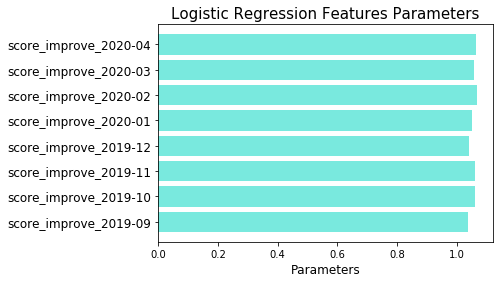

In [111]:
### Visualize the importance of features
label = ['score_improve_2019-09', 'score_improve_2019-10', 'score_improve_2019-11', 'score_improve_2019-12', \
         'score_improve_2020-01','score_improve_2020-02','score_improve_2020-03','score_improve_2020-04']
par = [1.036525, 1.058663, 1.061345, 1.039741, 1.049882, 1.067053, 1.058167, 1.062457]
#index = np.arange(len(label))
plt.rcParams["axes.grid"] = False
def plot_bar_x(x, y, z):
    # this is for plotting purpose
    index = np.arange(len(x))
    plt.barh(index, y, alpha =0.7, color = 'turquoise')
    plt.xlabel('Parameters', fontsize=12)
    plt.yticks(index, x, fontsize=12)
    plt.title(z, fontsize = 15)
    plt.show()
plot_bar_x(label, par, 'Logistic Regression Features Parameters')

# 2. Teachers' Characteristics
* This part prepares the features for teachers information, such as login days, login frequency per day.
* Outputs include varibles:
 * teacher_id
 * plan: 0 - 6 indicating different plan
 * paid: based on system information, with 1 being the paid account
 * paid_verified: based on system information and manual paid record, with 1 being the paid account
 * paid_plan: based on plans, with 1 being the paid account
 * state
 * email
 * num_student: number of students linked with the teacher
 * log_last: login last date
 * log_first: login first date
 * num_device: number of devices used to login 
 * num_browser: number of browsers used to login
 * month_log_days_year_month: number of login days, weighted based on the week of login
 * month_log_times_day_year_month: times of login per log day


In [4]:
df2 = pd.read_csv("C:/Users/peta/Desktop/Physics/teacher_info.csv")
df2['upgrade_time'] = pd.to_datetime(df2['upgrade_time'])
df2['log_time'] = pd.to_datetime(df2['log_time'], errors='coerce')

# Get the month of log time
df2['log_month'] = df2['log_time'].dt.strftime('%Y-%m')
# count the total log
df5 = df2.groupby(['teacher_id'])['log_time'].max() - df2.groupby(['teacher_id'])['log_time'].min()
df5 = df5.to_frame()
df5 = df5.rename(columns={'log_time':'age_days'})
df5['age_days'] = df5['age_days'].astype('timedelta64[D]')
df5.reset_index(level = 0, inplace = True)
# get the first login and last login time for each teacher
df3 = df2.groupby(['teacher_id'])['log_time'].agg(['max','min'])
df3.reset_index(level = 0, inplace = True)
df3 = df3.rename(columns={'max':'log_last', 'min':'log_first'})
# count the total login days for each teacher
df4 = df2.groupby(['teacher_id'])['log_time'].count()
df4 = df4.to_frame()
df4.reset_index(level = 0, inplace = True)
df4 = df4.rename(columns={'log_time':'total_log_days'})
# merge them all to df2
df2 = df2.merge(df5, on='teacher_id')
df2 = df2.merge(df4, on='teacher_id')
df2 = df2.merge(df3, on='teacher_id')
# get the first log_first_month and log_last_month
df2['log_first_month']=df2['log_first'].dt.strftime('%Y-%m')
df2['log_last_month']=df2['log_last'].dt.strftime('%Y-%m')
# drop observations with no log time
df2 = df2.loc[df2['log_first'].isnull()==False]


In [5]:

# get the freq of each month log = total num of login
## if this is the first month, total num of login - days*4/(5-week)

df6 = df2.groupby(['teacher_id','log_month'])['log_time'].count().to_frame()
df6 = df6.rename(columns={'log_time':'month_log_days'})
df6.reset_index(level = 0, inplace = True)
df6.reset_index(level = 0, inplace = True)
df2 = df2.merge(df6, on = ['teacher_id', 'log_month'])

df2['month_log_days_updated'] = df2['month_log_days']


# define a function to weight the total log days for the first month

def weight_days(x, y, z):
    '''# x: first log day, y: month log days, z: age days'''
        x = int(x.strftime('%d'))
        if z == 0: return y
        else: 
            if x<=6: return y
            elif x<= 12: return y*5/4
            elif x<= 18: return y*5/3
            elif x<= 24: return y*5/2
            else: return y*5


df2.loc[df2['log_month']==df2['log_first_month'], 'month_log_days_updated'] = \
df2.apply(lambda x: weight_days(x['log_first'], x['month_log_days'], x['age_days']), axis =1)
# drop columns have be processed
df2 = df2.drop(['month_log_days'], axis =1)
#rename month_log_days
df2 = df2.rename(columns={'month_log_days_updated':'month_log_days'})

# get the age log in times per day they logged in for each month
df6 = df2.groupby(['teacher_id','log_month'])['login_times'].mean().to_frame()
df6 = df6.rename(columns={'login_times':'month_log_times_day'})
df6.reset_index(level = 0, inplace = True)
df6.reset_index(level = 0, inplace = True)
df2 = df2.merge(df6, on = ['teacher_id', 'log_month'])

# get the number of device and browser
df4 = df2.groupby('teacher_id')['device_type','browser_type'].nunique()
df4 = df4.rename(columns={'device_type':'num_device', 'browser_type':'num_browser'})
df4.reset_index(level = 0, inplace = True)
df2 = df2.merge(df4, on = 'teacher_id')

# drop columns have be processed
df2 = df2.drop(['upgrade_time','login_times','log_time', 'login_gap'], axis =1)


# pivot by log_month for columns ['month_log_days', 'month_log_times_day']
df3= df2[['teacher_id', 'log_month', 'month_log_days', 'month_log_times_day']]
df3 = df3.drop_duplicates()
#df3=df3.pivot(index='teacher_id', columns='log_month', values = ['month_log_days', 'month_log_times_day'])
df3=df3.pivot(index='teacher_id', columns='log_month')[['month_log_days', 'month_log_times_day']]
df3.reset_index(level = 0, inplace = True)

# prepare to merge df3 with df4
df4 = df2.drop(['browser_type','device_type', 'log_month','month_log_days', 'month_log_times_day'], axis =1)
df4 = df4.drop_duplicates()
#df2 = df2.merge(df3, on = 'teacher_id')

df2 = df4.merge(df3, on='teacher_id')

# generate a more reliable indicator for paid account before 3/12/2020

# check email function
def check_email(x):
    if x in df3['email'].tolist():
        return 1
    elif x in df3['email2'].tolist():
        return 1
    else:
        return 0

df3 = pd.read_csv("C:/Users/peta/Desktop/Physics/teacher_pay.csv")
df3 = df3['email'].str.split(',', expand = True).iloc[:, :2]
df3 = df3.rename(columns={0:'email', 1:'email2'})
df3['paid_manual'] = 1
df2['paid_manual'] = df2['email'].apply(lambda x: check_email(x))
df2['check'] = df2['amount'] + df2['paid_manual']

def check_pay(x):
    if x>0: return 1
    else: return 0
df2['paid_verified'] = df2['check'].apply(lambda x: check_pay(x))

# drop unnecessary columns:
df2 = df2.drop(['amount','upgrade_method','paid_manual', 'check'], axis =1)
# paid plan
## def function
def check_plan(x):
    if x== 0 or x== 6: return 0
    else: return 1
df2['paid_plan'] = df2['plan'].apply(lambda x: check_plan(x))


df2.columns = list(map("_".join, df2.columns))
df2 = df2.rename(columns={'t_e_a_c_h_e_r___i_d':'teacher_id', 'p_l_a_n':'plan', 'p_a_i_d':'paid', 's_t_a_t_e':'state', 'e_m_a_i_l':'email',
       'n_u_m___s_t_u_d_e_n_t':'num_student', 'a_g_e___d_a_y_s':'age_days',
       't_o_t_a_l___l_o_g___d_a_y_s':'total_log_days', 'l_o_g___l_a_s_t':'log_last', 'l_o_g___f_i_r_s_t':'log_first',
       'l_o_g___f_i_r_s_t___m_o_n_t_h': 'log_first_month', 'l_o_g___l_a_s_t___m_o_n_t_h': 'log_last_month',
       'n_u_m___d_e_v_i_c_e':'num_device', 'n_u_m___b_r_o_w_s_e_r':'num_browser', 'p_a_i_d___v_e_r_i_f_i_e_d':'paid_verified', 'p_a_i_d___p_l_a_n':'paid_plan'})
df2.columns

df2.info()

C:\Users\peta\AN36292020\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\peta\AN36292020\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\peta\AN36292020\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4155 entries, 0 to 4154
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   teacher_id                   4155 non-null   int64         
 1   plan                         4155 non-null   int64         
 2   paid                         4155 non-null   int64         
 3   state                        3123 non-null   object        
 4   email                        4155 non-null   object        
 5   num_student                  4155 non-null   int64         
 6   age_days                     4155 non-null   float64       
 7   total_log_days               4155 non-null   int64         
 8   log_last                     4155 non-null   datetime64[ns]
 9   log_first                    4155 non-null   datetime64[ns]
 10  log_first_month              4155 non-null   object        
 11  log_last_month               4155 non-null 

# 3. Teacher Problem
* This part generates features for teachers problem checking behavior
    * teacher_id
    * month_total_problems_year_month: total problems checked by the teacher
    * t1_r_year-month: proportion of problems for practice session
    * t2_r_year-month: proportion of problems for extral practice session
    * t3_r_year-month:proportion of problems for assessment session
    


In [114]:
df3 = pd.read_csv("C:/Users/peta/Desktop/Physics/teacher_problem.csv")
df3['TIME'] = pd.to_datetime(df3['TIME'])
df3 = df3.rename(columns={'user_id':'teacher_id'})
# Get the month of log time
df3['problem_month'] = df3['TIME'].dt.strftime('%Y-%m')
#df3['TIME'] = df3['TIME'].dt.strftime('%Y-%m-%d')

# count the total problem days
df5 = df3.groupby(['teacher_id'])['TIME'].max() - df3.groupby(['teacher_id'])['TIME'].min()
df5 = df5.to_frame()
df5 = df5.rename(columns={'TIME':'age_days_problem'})
df5['age_days_problem'] = df5['age_days_problem'].astype('timedelta64[D]')
df5.reset_index(level = 0, inplace = True)

# get the first problem and last problem time for each teacher
df4 = df3.groupby(['teacher_id'])['TIME'].agg(['max','min'])
df4.reset_index(level = 0, inplace = True)
df4 = df4.rename(columns={'max':'problem_last', 'min':'problem_first'})
# get the first problem_first_month and log_last_month
df4['problem_first_month']=df4['problem_first'].dt.strftime('%Y-%m')

# count the total login days for each teacher

# merge them all to df2
df3 = df3.merge(df5, on='teacher_id')
df3 = df3.merge(df4, on='teacher_id')
#df3 = df3.merge(df6, on='teacher_id')

# get the total number of problems accessed
df6 = df3.groupby(['teacher_id','problem_month'])['num_problems'].sum().to_frame()
df6 = df6.rename(columns={'num_problems':'month_total_problems'})
df6.reset_index(level = 0, inplace = True)
df6.reset_index(level = 0, inplace = True)
df3 = df3.merge(df6, on = ['teacher_id', 'problem_month'])
# get the update total number of problems accessed


## if start after 15, weight it!
def weight_problems(x, y, z):
        x = int(x.strftime('%d'))
        if z == 0: return y
        else: 
            if x<=15: return y
            else: return y*2
df3['month_total_problems_updated']    = df3['month_total_problems']   
df3.loc[df3['problem_first_month']==df3['problem_month'], ['month_total_problems_updated']] = \
df3.apply(lambda x: weight_problems(x['problem_first'], x['month_total_problems'], x['age_days_problem']), axis =1)

# get the average of type ratio by month
df6 = df3.groupby(['teacher_id','problem_month'])['ratio_problem_type1'].mean().to_frame()
df6 = df6.rename(columns={'ratio_problem_type1':'t1_r'})
df6.reset_index(level = 0, inplace = True)
df6.reset_index(level = 0, inplace = True)
df3 = df3.merge(df6, on = ['teacher_id', 'problem_month'])

df6 = df3.groupby(['teacher_id','problem_month'])['ratio_problem_type2'].mean().to_frame()
df6 = df6.rename(columns={'ratio_problem_type2':'t2_r'})
df6.reset_index(level = 0, inplace = True)
df6.reset_index(level = 0, inplace = True)
df3 = df3.merge(df6, on = ['teacher_id', 'problem_month'])

df6 = df3.groupby(['teacher_id','problem_month'])['ratio_problem_type3'].mean().to_frame()
df6 = df6.rename(columns={'ratio_problem_type3':'t3_r'})
df6.reset_index(level = 0, inplace = True)
df6.reset_index(level = 0, inplace = True)
df3 = df3.merge(df6, on = ['teacher_id', 'problem_month'])

# drop used columns
df3 = df3.drop(['num_problems', 'TIME', 'ratio_problem_type1', 'ratio_problem_type2', 'ratio_problem_type3'], axis = 1)
# drop duplicate rows
df3 = df3.drop_duplicates()

# get the first month for each teacher
df4 = df3[['teacher_id', 'problem_first_month']]
df4 = df4.drop_duplicates()


# pivot table
#df3=df3.pivot(index='teacher_id', columns='log_month', values = ['month_log_days', 'month_log_times_day'])
df3=df3.pivot(index='teacher_id', columns='problem_month')[['month_total_problems','month_total_problems_updated' ,'t1_r', 't2_r','t3_r']]
df3.reset_index(level = 0, inplace = True)
df3.columns = list(map("_".join, df3.columns))
df3 = df3.rename(columns={'teacher_id_':'teacher_id'})

# merge df4 and df3
df3 = df3.merge(df4, on = ['teacher_id'])


df3.head(10)

,teacher_id,month_total_problems_2019-09,month_total_problems_2019-10,month_total_problems_2019-11,month_total_problems_2019-12,month_total_problems_2020-01,month_total_problems_2020-02,month_total_problems_2020-03,month_total_problems_2020-04,month_total_problems_updated_2019-09,...,t2_r_2020-04,t3_r_2019-09,t3_r_2019-10,t3_r_2019-11,t3_r_2019-12,t3_r_2020-01,t3_r_2020-02,t3_r_2020-03,t3_r_2020-04,problem_first_month
0,78,332.0,123.0,48.0,65.0,33.0,89.0,4.0,NaN,664.0,...,NaN,0.02660,0.000000,0.000000,0.0,0.00,0.00000,0.000000,NaN,2019-09
1,83,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356.0,...,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09
2,85,200.0,NaN,NaN,NaN,22.0,11.0,76.0,55.0,400.0,...,0.0182,0.08335,NaN,NaN,NaN,0.00,0.00000,0.210000,0.2727,2019-09
3,87,197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394.0,...,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09
4,88,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356.0,...,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09
5,89,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356.0,...,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09
6,90,387.0,189.0,83.0,56.0,105.0,92.0,63.0,79.0,774.0,...,0.0000,0.00000,0.111111,0.126986,0.0,0.25,0.07619,0.000000,0.3797,2019-09
7,91,198.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,396.0,...,NaN,0.00000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2019-09
8,92,336.0,156.0,116.0,49.0,146.0,79.0,29.0,NaN,672.0,...,NaN,0.00000,0.000000,0.000000,0.0,0.00,0.00000,0.333333,NaN,2019-09
9,93,191.0,54.0,NaN,18.0,54.0,24.0,18.0,NaN,382.0,...,NaN,0.00000,0.000000,NaN,0.0,0.00,0.00000,0.000000,NaN,2019-09


In [115]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1816 entries, 0 to 1815
Data columns (total 42 columns):
teacher_id                              1816 non-null int64
month_total_problems_2019-09            457 non-null float64
month_total_problems_2019-10            113 non-null float64
month_total_problems_2019-11            91 non-null float64
month_total_problems_2019-12            85 non-null float64
month_total_problems_2020-01            108 non-null float64
month_total_problems_2020-02            106 non-null float64
month_total_problems_2020-03            1167 non-null float64
month_total_problems_2020-04            368 non-null float64
month_total_problems_updated_2019-09    457 non-null float64
month_total_problems_updated_2019-10    113 non-null float64
month_total_problems_updated_2019-11    91 non-null float64
month_total_problems_updated_2019-12    85 non-null float64
month_total_problems_updated_2020-01    108 non-null float64
month_total_problems_updated_2020-02    106

# 4. Merge all tables by teacher_id

In [69]:
df1['teacher_id'] = pd.to_numeric(df1['teacher_id'], errors='coerce')
df2['teacher_id'] = pd.to_numeric(df2['teacher_id'], errors='coerce')
df3['teacher_id'] = pd.to_numeric(df3['teacher_id'], errors='coerce')

df = df2.merge(df1, on='teacher_id', how = 'left')


df = df.merge(df3, on='teacher_id', how = 'left')

df = df.drop(['email', 'total_log_days', 't2_r_2019-09', 't2_r_2019-10',
       't2_r_2019-11', 't2_r_2019-12', 't2_r_2020-01', 't2_r_2020-02',
       't2_r_2020-03', 't2_r_2020-04', 't3_r_2019-09', 't3_r_2019-10',
       't3_r_2019-11', 't3_r_2019-12', 't3_r_2020-01', 't3_r_2020-02',
       't3_r_2020-03', 't3_r_2020-04','log_last', 'log_first'], axis =1)
df = df.drop_duplicates(subset ='teacher_id', keep='first')

df.to_csv(r'C:/Users/peta/Desktop/Physics/final1.csv', index = False)

In [70]:
df.columns

Index(['teacher_id', 'plan', 'paid', 'state', 'num_student', 'age_days',
       'log_first_month', 'log_last_month', 'num_device', 'num_browser',
       'month_log_days_2019-07', 'month_log_days_2019-08',
       'month_log_days_2019-09', 'month_log_days_2019-10',
       'month_log_days_2019-11', 'month_log_days_2019-12',
       'month_log_days_2020-01', 'month_log_days_2020-02',
       'month_log_days_2020-03', 'month_log_days_2020-04',
       'month_log_times_day_2019-07', 'month_log_times_day_2019-08',
       'month_log_times_day_2019-09', 'month_log_times_day_2019-10',
       'month_log_times_day_2019-11', 'month_log_times_day_2019-12',
       'month_log_times_day_2020-01', 'month_log_times_day_2020-02',
       'month_log_times_day_2020-03', 'month_log_times_day_2020-04',
       'paid_verified', 'paid_plan', 'total_practice_month_teacher_2019-09',
       'total_practice_month_teacher_2019-10',
       'total_practice_month_teacher_2019-11',
       'total_practice_month_teacher_2019-1

## Get new columns the first, second, third month data for the following features, so that I can use 30 days, 60 days, and 90 days behavior to predict churn for 30, 60, and 90 days. 
### 1. 'month_log_days
### 2. month_log_times_day
### 3. total_practice_month_teacher
### 4. total_practice_month_udpated_teacher
### 5. score_improve
### 6. month_total_problems
### 7. month_total_problems_updated
### 8. t1_r
S

    

In [4]:
df = pd.read_csv("C:/Users/peta/Desktop/Physics/final1.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 82 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   teacher_id                                    4155 non-null   int64  
 1   plan                                          4155 non-null   int64  
 2   paid                                          4155 non-null   int64  
 3   state                                         3123 non-null   object 
 4   num_student                                   4155 non-null   int64  
 5   age_days                                      4155 non-null   float64
 6   log_first_month                               4155 non-null   object 
 7   log_last_month                                4155 non-null   object 
 8   num_device                                    4155 non-null   int64  
 9   num_browser                                   4155 non-null   i

In [61]:
def get_123_data_1(month, data_7, data_8, data_9, data_10, data_11, data_12, data_1, data_2):
    '''input:
            month: log_first_month
            data_x: the data for month x
       output:
            data_1
       '''
    data = 0
    if month == '2019-07':
        data = data_7
    elif month == '2019-08':
        data = data_8
    elif month == '2019-09':
        data = data_9
    elif month == '2019-10':
        data = data_10       
    elif month == '2019-11':
        data = data_11
    elif month == '2019-12':
        data = data_12
    return data


def get_123_data_2(month, data_7, data_8, data_9, data_10, data_11, data_12, data_1, data_2):
    '''input:
            month: log_first_month
            data_x: the data for month x
       output:
            data_1
       '''
    data = 0
    if month == '2019-07':
        data = data_8
    elif month == '2019-08':
        data = data_9
    elif month == '2019-09':
        data = data_10
    elif month == '2019-10':
        data = data_11       
    elif month == '2019-11':
        data = data_12
    elif month == '2019-12':
        data = data_1
    return data

def get_123_data_3(month, data_7, data_8, data_9, data_10, data_11, data_12, data_1, data_2):
    '''input:
            month: log_first_month
            data_x: the data for month x
       output:
            data_1
       '''
    data = 0
    if month == '2019-07':
        data = data_9
    elif month == '2019-08':
        data = data_10
    elif month == '2019-09':
        data = data_11
    elif month == '2019-10':
        data = data_12       
    elif month == '2019-11':
        data = data_1
    elif month == '2019-12':
        data = data_2
    return data
        

In [65]:
# 1. month_log_days
df1 ['month_log_days_1']= df1.apply(lambda x: get_123_data_1(x['log_first_month'], \
                                x['month_log_days_2019-07'],\
                                x['month_log_days_2019-08'],\
                                x['month_log_days_2019-09'],\
                                x['month_log_days_2019-10'],\
                                x['month_log_days_2019-11'],\
                                x['month_log_days_2019-12'],\
                                x['month_log_days_2020-01'],\
                                x['month_log_days_2020-02']), axis =1)
df1 ['month_log_days_2']= df1.apply(lambda x: get_123_data_2(x['log_first_month'], \
                                x['month_log_days_2019-07'],\
                                x['month_log_days_2019-08'],\
                                x['month_log_days_2019-09'],\
                                x['month_log_days_2019-10'],\
                                x['month_log_days_2019-11'],\
                                x['month_log_days_2019-12'],\
                                x['month_log_days_2020-01'],\
                                x['month_log_days_2020-02']), axis =1)
df1 ['month_log_days_3']= df1.apply(lambda x: get_123_data_3(x['log_first_month'], \
                                x['month_log_days_2019-07'],\
                                x['month_log_days_2019-08'],\
                                x['month_log_days_2019-09'],\
                                x['month_log_days_2019-10'],\
                                x['month_log_days_2019-11'],\
                                x['month_log_days_2019-12'],\
                                x['month_log_days_2020-01'],\
                                x['month_log_days_2020-02']), axis =1)

In [75]:
# 2. month_log_times_day_2019-07

df['month_log_times_day_1'] = 0
df['month_log_times_day_2'] = 0
df['month_log_times_day_3'] = 0
# 2019 -07 cohort
df.loc[df['log_first_month']=='2019-07', 'month_log_times_day_1'] = \
df.loc[df['log_first_month']=='2019-07', 'month_log_times_day_2019-07']
df.loc[df['log_first_month']=='2019-07', 'month_log_times_day_2'] = \
df.loc[df['log_first_month']=='2019-07', 'month_log_times_day_2019-08']
df.loc[df['log_first_month']=='2019-07', 'month_log_times_day_3'] = \
df.loc[df['log_first_month']=='2019-07', 'month_log_times_day_2019-09']
# 2019 -08 cohort
df.loc[df['log_first_month']=='2019-08', 'month_log_times_day_1'] = \
df.loc[df['log_first_month']=='2019-08', 'month_log_times_day_2019-08']
df.loc[df['log_first_month']=='2019-08', 'month_log_times_day_2'] = \
df.loc[df['log_first_month']=='2019-08', 'month_log_times_day_2019-09']
df.loc[df['log_first_month']=='2019-08', 'month_log_times_day_3'] = \
df.loc[df['log_first_month']=='2019-08', 'month_log_times_day_2019-10']
# 2019 -09 cohort
df.loc[df['log_first_month']=='2019-09', 'month_log_times_day_1'] = \
df.loc[df['log_first_month']=='2019-09', 'month_log_times_day_2019-09']
df.loc[df['log_first_month']=='2019-09', 'month_log_times_day_2'] = \
df.loc[df['log_first_month']=='2019-09', 'month_log_times_day_2019-10']
df.loc[df['log_first_month']=='2019-09', 'month_log_times_day_3'] = \
df.loc[df['log_first_month']=='2019-09', 'month_log_times_day_2019-11']
# 2019 -10 cohort
df.loc[df['log_first_month']=='2019-10', 'month_log_times_day_1'] = \
df.loc[df['log_first_month']=='2019-10', 'month_log_times_day_2019-10']
df.loc[df['log_first_month']=='2019-10', 'month_log_times_day_2'] = \
df.loc[df['log_first_month']=='2019-10', 'month_log_times_day_2019-11']
df.loc[df['log_first_month']=='2019-10', 'month_log_times_day_3'] = \
df.loc[df['log_first_month']=='2019-10', 'month_log_times_day_2019-12']
# 2019 -11 cohort
df.loc[df['log_first_month']=='2019-11', 'month_log_times_day_1'] = \
df.loc[df['log_first_month']=='2019-11', 'month_log_times_day_2019-11']
df.loc[df['log_first_month']=='2019-11', 'month_log_times_day_2'] = \
df.loc[df['log_first_month']=='2019-11', 'month_log_times_day_2019-12']
df.loc[df['log_first_month']=='2019-11', 'month_log_times_day_3'] = \
df.loc[df['log_first_month']=='2019-11', 'month_log_times_day_2020-01']
# 2019 -12 cohort
df.loc[df['log_first_month']=='2019-12', 'month_log_times_day_1'] = \
df.loc[df['log_first_month']=='2019-12', 'month_log_times_day_2019-12']
df.loc[df['log_first_month']=='2019-12', 'month_log_times_day_2'] = \
df.loc[df['log_first_month']=='2019-12', 'month_log_times_day_2020-01']
df.loc[df['log_first_month']=='2019-12', 'month_log_times_day_3'] = \
df.loc[df['log_first_month']=='2019-12', 'month_log_times_day_2020-02']

In [76]:
# 3. total_practice_month_teacher_2019-10
# 3. total_practice_month_teacher_2019-10
df['total_practice_month_teacher_1'] = 0
df['total_practice_month_teacher_2'] = 0
df['total_practice_month_teacher_3'] = 0

# 2019 -09 cohort
df.loc[df['practice_first_month_teacher']=='2019-09', 'total_practice_month_teacher_1'] = \
df.loc[df['practice_first_month_teacher']=='2019-09', 'total_practice_month_teacher_2019-09']
df.loc[df['practice_first_month_teacher']=='2019-09', 'total_practice_month_teacher_2'] = \
df.loc[df['practice_first_month_teacher']=='2019-09', 'total_practice_month_teacher_2019-10']
df.loc[df['practice_first_month_teacher']=='2019-09', 'total_practice_month_teacher_3'] = \
df.loc[df['practice_first_month_teacher']=='2019-09', 'total_practice_month_teacher_2019-11']
# 2019 -10 cohort
df.loc[df['practice_first_month_teacher']=='2019-10', 'total_practice_month_teacher_1'] = \
df.loc[df['practice_first_month_teacher']=='2019-10', 'total_practice_month_teacher_2019-10']
df.loc[df['practice_first_month_teacher']=='2019-10', 'total_practice_month_teacher_2'] = \
df.loc[df['practice_first_month_teacher']=='2019-10', 'total_practice_month_teacher_2019-11']
df.loc[df['practice_first_month_teacher']=='2019-10', 'total_practice_month_teacher_3'] = \
df.loc[df['practice_first_month_teacher']=='2019-10', 'total_practice_month_teacher_2019-12']
# 2019 -11 cohort
df.loc[df['practice_first_month_teacher']=='2019-11', 'total_practice_month_teacher_1'] = \
df.loc[df['practice_first_month_teacher']=='2019-11', 'total_practice_month_teacher_2019-11']
df.loc[df['practice_first_month_teacher']=='2019-11', 'total_practice_month_teacher_2'] = \
df.loc[df['practice_first_month_teacher']=='2019-11', 'total_practice_month_teacher_2019-12']
df.loc[df['practice_first_month_teacher']=='2019-11', 'total_practice_month_teacher_3'] = \
df.loc[df['practice_first_month_teacher']=='2019-11', 'total_practice_month_teacher_2020-01']
# 2019 -12 cohort
df.loc[df['practice_first_month_teacher']=='2019-12', 'total_practice_month_teacher_1'] = \
df.loc[df['practice_first_month_teacher']=='2019-12', 'total_practice_month_teacher_2019-12']
df.loc[df['practice_first_month_teacher']=='2019-12', 'total_practice_month_teacher_2'] = \
df.loc[df['practice_first_month_teacher']=='2019-12', 'total_practice_month_teacher_2020-01']
df.loc[df['practice_first_month_teacher']=='2019-12', 'total_practice_month_teacher_3'] = \
df.loc[df['practice_first_month_teacher']=='2019-12', 'total_practice_month_teacher_2020-02']


In [77]:
# 4. total_practice_month_udpated_teacher_2019-10
df['total_practice_month_udpated_teacher_1'] = 0
df['total_practice_month_udpated_teacher_2'] = 0
df['total_practice_month_udpated_teacher_3'] = 0

# 2019 -09 cohort
df.loc[df['practice_first_month_teacher']=='2019-09', 'total_practice_month_udpated_teacher_1'] = \
df.loc[df['practice_first_month_teacher']=='2019-09', 'total_practice_month_udpated_teacher_2019-09']
df.loc[df['practice_first_month_teacher']=='2019-09', 'total_practice_month_udpated_teacher_2'] = \
df.loc[df['practice_first_month_teacher']=='2019-09', 'total_practice_month_udpated_teacher_2019-10']
df.loc[df['practice_first_month_teacher']=='2019-09', 'total_practice_month_udpated_teacher_3'] = \
df.loc[df['practice_first_month_teacher']=='2019-09', 'total_practice_month_udpated_teacher_2019-11']
# 2019 -10 cohort
df.loc[df['practice_first_month_teacher']=='2019-10', 'total_practice_month_udpated_teacher_1'] = \
df.loc[df['practice_first_month_teacher']=='2019-10', 'total_practice_month_udpated_teacher_2019-10']
df.loc[df['practice_first_month_teacher']=='2019-10', 'total_practice_month_udpated_teacher_2'] = \
df.loc[df['practice_first_month_teacher']=='2019-10', 'total_practice_month_udpated_teacher_2019-11']
df.loc[df['practice_first_month_teacher']=='2019-10', 'total_practice_month_udpated_teacher_3'] = \
df.loc[df['practice_first_month_teacher']=='2019-10', 'total_practice_month_udpated_teacher_2019-12']
# 2019 -11 cohort
df.loc[df['practice_first_month_teacher']=='2019-11', 'total_practice_month_udpated_teacher_1'] = \
df.loc[df['practice_first_month_teacher']=='2019-11', 'total_practice_month_udpated_teacher_2019-11']
df.loc[df['practice_first_month_teacher']=='2019-11', 'total_practice_month_udpated_teacher_2'] = \
df.loc[df['practice_first_month_teacher']=='2019-11', 'total_practice_month_udpated_teacher_2019-12']
df.loc[df['practice_first_month_teacher']=='2019-11', 'total_practice_month_udpated_teacher_3'] = \
df.loc[df['practice_first_month_teacher']=='2019-11', 'total_practice_month_udpated_teacher_2020-01']
# 2019 -12 cohort
df.loc[df['practice_first_month_teacher']=='2019-12', 'total_practice_month_udpated_teacher_1'] = \
df.loc[df['practice_first_month_teacher']=='2019-12', 'total_practice_month_udpated_teacher_2019-12']
df.loc[df['practice_first_month_teacher']=='2019-12', 'total_practice_month_udpated_teacher_2'] = \
df.loc[df['practice_first_month_teacher']=='2019-12', 'total_practice_month_udpated_teacher_2020-01']
df.loc[df['practice_first_month_teacher']=='2019-12', 'total_practice_month_udpated_teacher_3'] = \
df.loc[df['practice_first_month_teacher']=='2019-12', 'total_practice_month_udpated_teacher_2020-02']


In [78]:
# 5. score_improve

df['score_improve_1'] = 1
df['score_improve_2'] = 1
df['score_improve_3'] = 1

# 2019 -09 cohort
df.loc[df['practice_first_month_teacher']=='2019-09', 'score_improve_1'] = \
df.loc[df['practice_first_month_teacher']=='2019-09', 'score_improve_2019-09']
df.loc[df['practice_first_month_teacher']=='2019-09', 'score_improve_2'] = \
df.loc[df['practice_first_month_teacher']=='2019-09', 'score_improve_2019-10']
df.loc[df['practice_first_month_teacher']=='2019-09', 'score_improve_3'] = \
df.loc[df['practice_first_month_teacher']=='2019-09', 'score_improve_2019-11']
# 2019 -10 cohort
df.loc[df['practice_first_month_teacher']=='2019-10', 'score_improve_1'] = \
df.loc[df['practice_first_month_teacher']=='2019-10', 'score_improve_2019-10']
df.loc[df['practice_first_month_teacher']=='2019-10', 'score_improve_2'] = \
df.loc[df['practice_first_month_teacher']=='2019-10', 'score_improve_2019-11']
df.loc[df['practice_first_month_teacher']=='2019-10', 'score_improve_3'] = \
df.loc[df['practice_first_month_teacher']=='2019-10', 'score_improve_2019-12']
# 2019 -11 cohort
df.loc[df['practice_first_month_teacher']=='2019-11', 'score_improve_1'] = \
df.loc[df['practice_first_month_teacher']=='2019-11', 'score_improve_2019-11']
df.loc[df['practice_first_month_teacher']=='2019-11', 'score_improve_2'] = \
df.loc[df['practice_first_month_teacher']=='2019-11', 'score_improve_2019-12']
df.loc[df['practice_first_month_teacher']=='2019-11', 'score_improve_3'] = \
df.loc[df['practice_first_month_teacher']=='2019-11', 'score_improve_2020-01']
# 2019 -12 cohort
df.loc[df['practice_first_month_teacher']=='2019-12', 'score_improve_1'] = \
df.loc[df['practice_first_month_teacher']=='2019-12', 'score_improve_2019-12']
df.loc[df['practice_first_month_teacher']=='2019-12', 'score_improve_2'] = \
df.loc[df['practice_first_month_teacher']=='2019-12', 'score_improve_2020-01']
df.loc[df['practice_first_month_teacher']=='2019-12', 'score_improve_3'] = \
df.loc[df['practice_first_month_teacher']=='2019-12', 'score_improve_2020-02']




In [79]:
# 6. month_total_problems
df['month_total_problems_1'] = 0
df['month_total_problems_2'] = 0
df['month_total_problems_3'] = 0

# 2019 -09 cohort
df.loc[df['problem_first_month']=='2019-09', 'month_total_problems_1'] = \
df.loc[df['problem_first_month']=='2019-09', 'month_total_problems_2019-09']
df.loc[df['problem_first_month']=='2019-09', 'month_total_problems_2'] = \
df.loc[df['problem_first_month']=='2019-09', 'month_total_problems_2019-10']
df.loc[df['problem_first_month']=='2019-09', 'month_total_problems_3'] = \
df.loc[df['problem_first_month']=='2019-09', 'month_total_problems_2019-11']
# 2019 -10 cohort
df.loc[df['problem_first_month']=='2019-10', 'month_total_problems_1'] = \
df.loc[df['problem_first_month']=='2019-10', 'month_total_problems_2019-10']
df.loc[df['problem_first_month']=='2019-10', 'month_total_problems_2'] = \
df.loc[df['problem_first_month']=='2019-10', 'month_total_problems_2019-11']
df.loc[df['problem_first_month']=='2019-10', 'month_total_problems_3'] = \
df.loc[df['problem_first_month']=='2019-10', 'month_total_problems_2019-12']
# 2019 -11 cohort
df.loc[df['problem_first_month']=='2019-11', 'month_total_problems_1'] = \
df.loc[df['problem_first_month']=='2019-11', 'month_total_problems_2019-11']
df.loc[df['problem_first_month']=='2019-11', 'month_total_problems_2'] = \
df.loc[df['problem_first_month']=='2019-11', 'month_total_problems_2019-12']
df.loc[df['problem_first_month']=='2019-11', 'month_total_problems_3'] = \
df.loc[df['problem_first_month']=='2019-11', 'month_total_problems_2020-01']
# 2019 -12 cohort
df.loc[df['problem_first_month']=='2019-12', 'month_total_problems_1'] = \
df.loc[df['problem_first_month']=='2019-12', 'month_total_problems_2019-12']
df.loc[df['problem_first_month']=='2019-12', 'month_total_problems_2'] = \
df.loc[df['problem_first_month']=='2019-12', 'month_total_problems_2020-01']
df.loc[df['problem_first_month']=='2019-12', 'month_total_problems_3'] = \
df.loc[df['problem_first_month']=='2019-12', 'month_total_problems_2020-02']





In [80]:
# 7. month_total_problems_updated
df['month_total_problems_updated_1'] = 0
df['month_total_problems_updated_2'] = 0
df['month_total_problems_updated_3'] = 0

# 2019 -09 cohort
df.loc[df['problem_first_month']=='2019-09', 'month_total_problems_updated_1'] = \
df.loc[df['problem_first_month']=='2019-09', 'month_total_problems_updated_2019-09']
df.loc[df['problem_first_month']=='2019-09', 'month_total_problems_updated_2'] = \
df.loc[df['problem_first_month']=='2019-09', 'month_total_problems_updated_2019-10']
df.loc[df['problem_first_month']=='2019-09', 'month_total_problems_updated_3'] = \
df.loc[df['problem_first_month']=='2019-09', 'month_total_problems_updated_2019-11']
# 2019 -10 cohort
df.loc[df['problem_first_month']=='2019-10', 'month_total_problems_updated_1'] = \
df.loc[df['problem_first_month']=='2019-10', 'month_total_problems_updated_2019-10']
df.loc[df['problem_first_month']=='2019-10', 'month_total_problems_updated_2'] = \
df.loc[df['problem_first_month']=='2019-10', 'month_total_problems_updated_2019-11']
df.loc[df['problem_first_month']=='2019-10', 'month_total_problems_updated_3'] = \
df.loc[df['problem_first_month']=='2019-10', 'month_total_problems_updated_2019-12']
# 2019 -11 cohort
df.loc[df['problem_first_month']=='2019-11', 'month_total_problems_updated_1'] = \
df.loc[df['problem_first_month']=='2019-11', 'month_total_problems_updated_2019-11']
df.loc[df['problem_first_month']=='2019-11', 'month_total_problems_updated_2'] = \
df.loc[df['problem_first_month']=='2019-11', 'month_total_problems_updated_2019-12']
df.loc[df['problem_first_month']=='2019-11', 'month_total_problems_updated_3'] = \
df.loc[df['problem_first_month']=='2019-11', 'month_total_problems_updated_2020-01']
# 2019 -12 cohort
df.loc[df['problem_first_month']=='2019-12', 'month_total_problems_updated_1'] = \
df.loc[df['problem_first_month']=='2019-12', 'month_total_problems_updated_2019-12']
df.loc[df['problem_first_month']=='2019-12', 'month_total_problems_updated_2'] = \
df.loc[df['problem_first_month']=='2019-12', 'month_total_problems_updated_2020-01']
df.loc[df['problem_first_month']=='2019-12', 'month_total_problems_updated_3'] = \
df.loc[df['problem_first_month']=='2019-12', 'month_total_problems_updated_2020-02']





In [81]:
# 8. t1_r

#df['t1_r_1'] = na
#df['t1_r_2'] = 0
#df['t1_r_3'] = 0

# 2019 -09 cohort
df.loc[df['problem_first_month']=='2019-09', 't1_r_1'] = \
df.loc[df['problem_first_month']=='2019-09', 't1_r_2019-09']
df.loc[df['problem_first_month']=='2019-09', 't1_r_2'] = \
df.loc[df['problem_first_month']=='2019-09', 't1_r_2019-10']
df.loc[df['problem_first_month']=='2019-09', 't1_r_3'] = \
df.loc[df['problem_first_month']=='2019-09', 't1_r_2019-11']
# 2019 -10 cohort
df.loc[df['problem_first_month']=='2019-10', 't1_r_1'] = \
df.loc[df['problem_first_month']=='2019-10', 't1_r_2019-10']
df.loc[df['problem_first_month']=='2019-10', 't1_r_2'] = \
df.loc[df['problem_first_month']=='2019-10', 't1_r_2019-11']
df.loc[df['problem_first_month']=='2019-10', 't1_r_3'] = \
df.loc[df['problem_first_month']=='2019-10', 't1_r_2019-12']
# 2019 -11 cohort
df.loc[df['problem_first_month']=='2019-11', 't1_r_1'] = \
df.loc[df['problem_first_month']=='2019-11', 't1_r_2019-11']
df.loc[df['problem_first_month']=='2019-11', 't1_r_2'] = \
df.loc[df['problem_first_month']=='2019-11', 't1_r_2019-12']
df.loc[df['problem_first_month']=='2019-11', 't1_r_3'] = \
df.loc[df['problem_first_month']=='2019-11', 't1_r_2020-01']
# 2019 -12 cohort
df.loc[df['problem_first_month']=='2019-12', 't1_r_1'] = \
df.loc[df['problem_first_month']=='2019-12', 't1_r_2019-12']
df.loc[df['problem_first_month']=='2019-12', 't1_r_2'] = \
df.loc[df['problem_first_month']=='2019-12', 't1_r_2020-01']
df.loc[df['problem_first_month']=='2019-12', 't1_r_3'] = \
df.loc[df['problem_first_month']=='2019-12', 't1_r_2020-02']

In [82]:
df.columns

Index(['teacher_id', 'plan', 'paid', 'state', 'num_student', 'age_days',
       'log_first_month', 'log_last_month', 'num_device', 'num_browser',
       ...
       'score_improve_3', 'month_total_problems_1', 'month_total_problems_2',
       'month_total_problems_3', 'month_total_problems_updated_1',
       'month_total_problems_updated_2', 'month_total_problems_updated_3',
       't1_r_1', 't1_r_2', 't1_r_3'],
      dtype='object', length=106)

In [83]:
# drop old columns
df = df.drop(['month_log_days_2019-07', 'month_log_days_2019-08',
       'month_log_days_2019-09', 'month_log_days_2019-10',
       'month_log_days_2019-11', 'month_log_days_2019-12',
       'month_log_days_2020-01', 'month_log_days_2020-02',
       'month_log_days_2020-03', 'month_log_days_2020-04',
       'month_log_times_day_2019-07', 'month_log_times_day_2019-08',
       'month_log_times_day_2019-09', 'month_log_times_day_2019-10',
       'month_log_times_day_2019-11', 'month_log_times_day_2019-12',
       'month_log_times_day_2020-01', 'month_log_times_day_2020-02',
       'month_log_times_day_2020-03', 'month_log_times_day_2020-04',
       'total_practice_month_teacher_2019-09',
       'total_practice_month_teacher_2019-10',
       'total_practice_month_teacher_2019-11',
       'total_practice_month_teacher_2019-12',
       'total_practice_month_teacher_2020-01',
       'total_practice_month_teacher_2020-02',
       'total_practice_month_teacher_2020-03',
       'total_practice_month_teacher_2020-04',
       'total_practice_month_udpated_teacher_2019-09',
       'total_practice_month_udpated_teacher_2019-10',
       'total_practice_month_udpated_teacher_2019-11',
       'total_practice_month_udpated_teacher_2019-12',
       'total_practice_month_udpated_teacher_2020-01',
       'total_practice_month_udpated_teacher_2020-02',
       'total_practice_month_udpated_teacher_2020-03',
       'total_practice_month_udpated_teacher_2020-04', 
       'score_improve_2019-09',
       'score_improve_2019-10', 'score_improve_2019-11',
       'score_improve_2019-12', 'score_improve_2020-01',
       'score_improve_2020-02', 'score_improve_2020-03',
       'score_improve_2020-04', 
       'month_total_problems_2019-09', 'month_total_problems_2019-10',
       'month_total_problems_2019-11', 'month_total_problems_2019-12',
       'month_total_problems_2020-01', 'month_total_problems_2020-02',
       'month_total_problems_2020-03', 'month_total_problems_2020-04',
       'month_total_problems_updated_2019-09',
       'month_total_problems_updated_2019-10',
       'month_total_problems_updated_2019-11',
       'month_total_problems_updated_2019-12',
       'month_total_problems_updated_2020-01',
       'month_total_problems_updated_2020-02',
       'month_total_problems_updated_2020-03',
       'month_total_problems_updated_2020-04',
       't1_r_2019-09', 't1_r_2019-10',
       't1_r_2019-11', 't1_r_2019-12', 
       't1_r_2020-01', 't1_r_2020-02',
       't1_r_2020-03', 't1_r_2020-04'], axis =1)

In [84]:
df.columns

Index(['teacher_id', 'plan', 'paid', 'state', 'num_student', 'age_days',
       'log_first_month', 'log_last_month', 'num_device', 'num_browser',
       'paid_verified', 'paid_plan', 'practice_first_month_teacher',
       'problem_first_month', 'month_log_days_1', 'month_log_days_2',
       'month_log_days_3', 'month_log_times_day_1', 'month_log_times_day_2',
       'month_log_times_day_3', 'total_practice_month_teacher_1',
       'total_practice_month_teacher_2', 'total_practice_month_teacher_3',
       'total_practice_month_udpated_teacher_1',
       'total_practice_month_udpated_teacher_2',
       'total_practice_month_udpated_teacher_3', 'score_improve_1',
       'score_improve_2', 'score_improve_3', 'month_total_problems_1',
       'month_total_problems_2', 'month_total_problems_3',
       'month_total_problems_updated_1', 'month_total_problems_updated_2',
       'month_total_problems_updated_3', 't1_r_1', 't1_r_2', 't1_r_3'],
      dtype='object')

In [85]:
df.to_csv(r'C:/Users/peta/Desktop/Physics/final2.csv', index = False)

In [86]:
df[['t1_r_1', 't1_r_2', 't1_r_3']].describe()

,t1_r_1,t1_r_2,t1_r_3
count,531.000000,85.000000,71.000000
mean,0.980566,0.908491,0.918606
std,0.087543,0.156176,0.146761
min,0.000000,0.000000,0.381733
25%,1.000000,0.833333,0.879461
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


# 5. fill na

In [93]:
df = pd.read_csv(r'C:/Users/peta/Desktop/Physics/final2.csv')

In [94]:
df.describe()

,teacher_id,plan,paid,num_student,age_days,num_device,num_browser,paid_verified,paid_plan,month_log_days_1,...,score_improve_3,month_total_problems_1,month_total_problems_2,month_total_problems_3,month_total_problems_updated_1,month_total_problems_updated_2,month_total_problems_updated_3,t1_r_1,t1_r_2,t1_r_3
count,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,...,4107.000000,4155.000000,3709.000000,3695.000000,4155.000000,3709.000000,3695.000000,531.000000,85.000000,71.000000
mean,14079.051986,3.623345,0.061613,5.204091,11.352587,1.057280,1.059928,0.017810,0.442118,0.426233,...,1.000522,10.480385,2.015098,1.376455,19.917208,2.015098,1.376455,0.980566,0.908491,0.918606
std,7386.881597,2.165823,0.240479,19.129270,41.469378,0.232406,0.260586,0.132276,0.496698,1.662154,...,0.015318,39.642885,17.750679,12.737589,78.504690,17.750679,12.737589,0.087543,0.156176,0.146761
min,78.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.408163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.381733
25%,9827.500000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.833333,0.879461
50%,12967.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,20633.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,28318.000000,6.000000,1.000000,276.000000,250.000000,2.000000,4.000000,1.000000,1.000000,30.000000,...,1.377410,499.000000,430.000000,274.000000,998.000000,430.000000,274.000000,1.000000,1.000000,1.000000


In [95]:
# high income states
df['high_income_state']= 0
df.loc[df['state'] =='District of Columbia', 'high_income_state']= 1
df.loc[df['state'] =='Maryland', 'high_income_state']= 1
df.loc[df['state'] =='New Jersey', 'high_income_state']= 1
df.loc[df['state'] =='Hawaii', 'high_income_state']= 1
df.loc[df['state'] =='Massachusetts', 'high_income_state']= 1
df.loc[df['state'] =='Connecticut', 'high_income_state']= 1
df.loc[df['state'] =='California', 'high_income_state']= 1
df.loc[df['state'] =='New Hampshire', 'high_income_state']= 1
df.loc[df['state'] =='Alaska', 'high_income_state']= 1
df.loc[df['state'] =='Washington', 'high_income_state']= 1
df.loc[df['state'] =='Virginia', 'high_income_state']= 1
df.loc[df['state'] =='Colorado', 'high_income_state']= 1
df.loc[df['state'] =='Utah', 'high_income_state']= 1
df.loc[df['state'] =='Minnesota', 'high_income_state']= 1
df.loc[df['state'] =='New York', 'high_income_state']= 1
df.loc[df['state'] =='Illinois', 'high_income_state']= 1
df.loc[df['state'] =='Delaware', 'high_income_state']= 1
df.loc[df['state'] =='Rhode Island', 'high_income_state']= 1
df.loc[df['state'] =='North Dakota', 'high_income_state']= 1
df.loc[df['state'] =='Oregon', 'high_income_state']= 1

In [96]:
# month log days fill na with 0
df['month_log_days_1'].fillna(0, inplace = True)
df['month_log_days_2'].fillna(0, inplace = True)
df['month_log_days_3'].fillna(0, inplace = True)
# month log times fill na with 0
df['month_log_times_day_1'].fillna(0, inplace = True)
df['month_log_times_day_2'].fillna(0, inplace = True)
df['month_log_times_day_3'].fillna(0, inplace = True)
# total_practice_month_teacher fill na with 0
df['total_practice_month_teacher_1'].fillna(0, inplace = True)
df['total_practice_month_teacher_2'].fillna(0, inplace = True)
df['total_practice_month_teacher_3'].fillna(0, inplace = True)
# total_practice_month_udpated_teacher fill na with 0
df['total_practice_month_udpated_teacher_1'].fillna(0, inplace = True)
df['total_practice_month_udpated_teacher_2'].fillna(0, inplace = True)
df['total_practice_month_udpated_teacher_3'].fillna(0, inplace = True)
# score_improve fill na with 1

# month_total_problems fill na with 0
df['month_total_problems_1'].fillna(0, inplace = True)



df['month_total_problems_2'].fillna(0, inplace = True)
df['month_total_problems_3'].fillna(0, inplace = True)
# month_total_problems_updated fill na with 0
df['month_total_problems_updated_1'].fillna(0, inplace = True)
df['month_total_problems_updated_2'].fillna(0, inplace = True)
df['month_total_problems_updated_3'].fillna(0, inplace = True)
# t1_r fill na with 0
df['t1_r_1'].fillna(0.98, inplace = True)
df['t1_r_2'].fillna(0.98, inplace = True)
df['t1_r_3'].fillna(0.98, inplace = True)
df.columns

Index(['teacher_id', 'plan', 'paid', 'state', 'num_student', 'age_days',
       'log_first_month', 'log_last_month', 'num_device', 'num_browser',
       'paid_verified', 'paid_plan', 'practice_first_month_teacher',
       'problem_first_month', 'month_log_days_1', 'month_log_days_2',
       'month_log_days_3', 'month_log_times_day_1', 'month_log_times_day_2',
       'month_log_times_day_3', 'total_practice_month_teacher_1',
       'total_practice_month_teacher_2', 'total_practice_month_teacher_3',
       'total_practice_month_udpated_teacher_1',
       'total_practice_month_udpated_teacher_2',
       'total_practice_month_udpated_teacher_3', 'score_improve_1',
       'score_improve_2', 'score_improve_3', 'month_total_problems_1',
       'month_total_problems_2', 'month_total_problems_3',
       'month_total_problems_updated_1', 'month_total_problems_updated_2',
       'month_total_problems_updated_3', 't1_r_1', 't1_r_2', 't1_r_3',
       'high_income_state'],
      dtype='object')

In [97]:
df.to_csv(r'C:/Users/peta/Desktop/Physics/final3.csv', index = False)

In [98]:
df['score_improve_1'].describe()

count    4139.000000
mean        1.000712
std         0.022286
min         0.091304
25%         1.000000
50%         1.000000
75%         1.000000
max         1.567954
Name: score_improve_1, dtype: float64